In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
csv1 = "2020_US_Region_Mobility_Report.csv"
csv2 = "2020_US_Region_Mobility_Report2.csv"
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

In [3]:
merged_df = pd.concat([df1, df2])
merged_df.head()

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,United States,NaN,NaN,2/15/2020,6.0,2.0,15.0,3.0,2.0,-1.0
1,United States,NaN,NaN,2/16/2020,7.0,1.0,16.0,2.0,0.0,-1.0
2,United States,NaN,NaN,2/17/2020,6.0,0.0,28.0,-9.0,-24.0,5.0
3,United States,NaN,NaN,2/18/2020,0.0,-1.0,6.0,1.0,0.0,1.0
4,United States,NaN,NaN,2/19/2020,2.0,0.0,8.0,1.0,1.0,0.0


In [4]:
merged_df = merged_df.rename(columns={"sub_region_2":"County",
                                      "date":"Date",
                                      "retail_and_recreation_percent_change_from_baseline":"Retail and Recreation",
                                      "grocery_and_pharmacy_percent_change_from_baseline":"Grocery and Pharmacy",
                                      "parks_percent_change_from_baseline":"Parks",
                                      "transit_stations_percent_change_from_baseline":"Transit Stations",
                                      "workplaces_percent_change_from_baseline":"Workplaces",
                                      "residential_percent_change_from_baseline":"Residential"
})
merged_df = merged_df.drop(columns=["country_region"])
merged_df = merged_df.drop(columns=["sub_region_1"])

In [5]:
merged_df

,County,Date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
0,NaN,2/15/2020,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,2/16/2020,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,2/17/2020,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,2/18/2020,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,2/19/2020,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
277061,Weston County,9/15/2020,NaN,NaN,NaN,NaN,-11.0,NaN
277062,Weston County,9/16/2020,NaN,NaN,NaN,NaN,-12.0,NaN
277063,Weston County,9/17/2020,NaN,NaN,NaN,NaN,-7.0,NaN
277064,Weston County,9/18/2020,NaN,NaN,NaN,NaN,-9.0,NaN


In [6]:
# city_group = merged_df.groupby('County')
rr_group = merged_df.groupby('Date')['Retail and Recreation'].mean()
date_group = merged_df.groupby('Date').mean()
date_df = pd.DataFrame(date_group).reset_index()
date_df
# places_avg, = plt.plot(places, avg_rr, color="blue")
# plt.show()

,Date,Retail and Recreation,Grocery and Pharmacy,Parks,Transit Stations,Workplaces,Residential
0,2/15/2020,6.438312,2.379042,16.656366,4.305752,0.440956,-0.607306
1,2/16/2020,7.986545,2.510529,17.794574,3.750263,0.483758,-0.611529
2,2/17/2020,3.865924,-0.345273,27.884323,1.809293,-17.582155,4.471510
3,2/18/2020,-0.193126,-1.269536,5.355491,2.243528,-0.005490,0.973856
4,2/19/2020,2.079837,0.579079,7.988456,2.474335,0.884461,0.087516
...,...,...,...,...,...,...,...
215,9/5/2020,NaN,NaN,NaN,NaN,-15.193681,1.301932
216,9/6/2020,NaN,NaN,NaN,NaN,-16.600000,0.775132
217,9/7/2020,NaN,NaN,NaN,NaN,-67.014669,15.438053
218,9/8/2020,NaN,NaN,NaN,NaN,-27.914183,6.520349


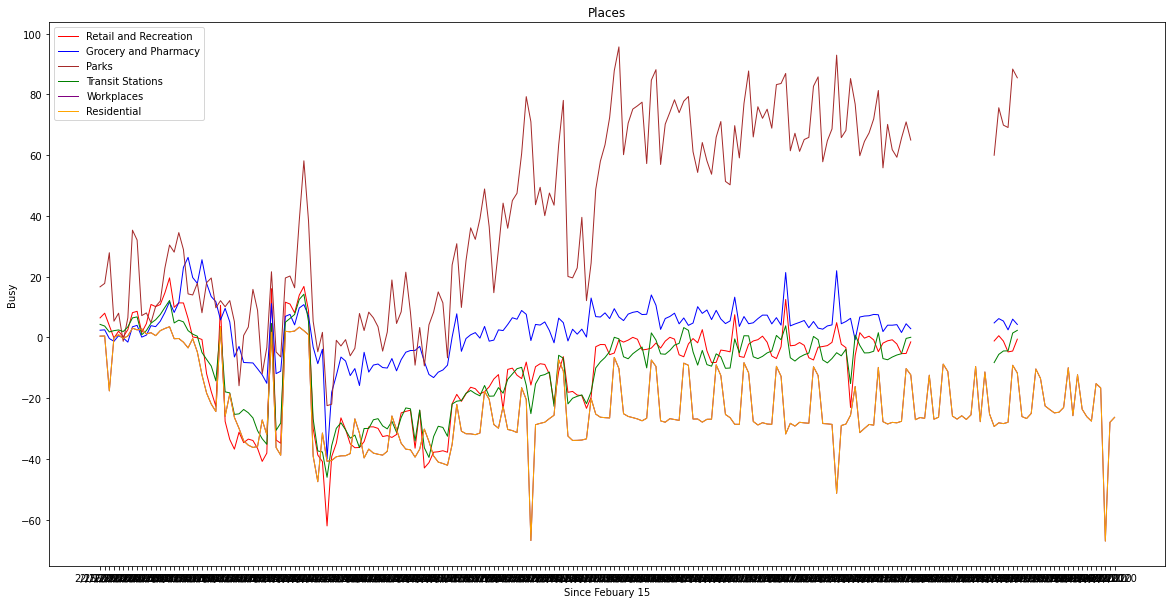

In [11]:
r_r = date_df["Retail and Recreation"]
g_p = date_df["Grocery and Pharmacy"]
prks = date_df["Parks"]
t_s = date_df["Transit Stations"]
w_p = date_df["Workplaces"]
rd = date_df["Residential"]
date = date_df["Date"]
rr, = plt.plot(date, r_r, color="red", label="Retail and Recreation", linewidth=1)
gp, = plt.plot(date, g_p, color="blue", label="Grocery and Pharmacy", linewidth=1)
prk, = plt.plot(date, prks, color="brown", label="Parks", linewidth=1)
ts, = plt.plot(date, t_s, color="green", label="Transit Stations", linewidth=1)
wp, = plt.plot(date, w_p, color="purple", label="Workplaces", linewidth=1)
rd, = plt.plot(date, w_p, color="orange", label="Residential", linewidth=1)
plt.title("Places")
plt.xlabel("Since Febuary 15")
plt.ylabel("Busy")
plt.legend(loc="best")

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
plt.savefig("places.png")
plt.show()